# Day 14 - Pretrained Networks

### Ready, set, almost run

* We can look at the model architecture by printing its value

In [1]:
from torchvision import models
resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT)

In [2]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

* Each line represents a PyTorch module
* A module in PyTorch corresponds to a layer (though each module might actually contain multiple layers, as modules can be nested)
* This is the typical anatomy of a large computer vision model: A cascade of filters and nonlinearities, followed by a fully connected layer to output the classes
* The `resnet` can be called like a function, with an image as the input
* Before that, we have to transform the image to the correct size, and normalize the pixels, using `transforms` provided by `torchvision`
* These allow us to define pipelines for our data to go through

In [3]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.225, 0.224, 0.225],
    )
])

* The pipeline we define here does exactly what the `transforms`' names suggest

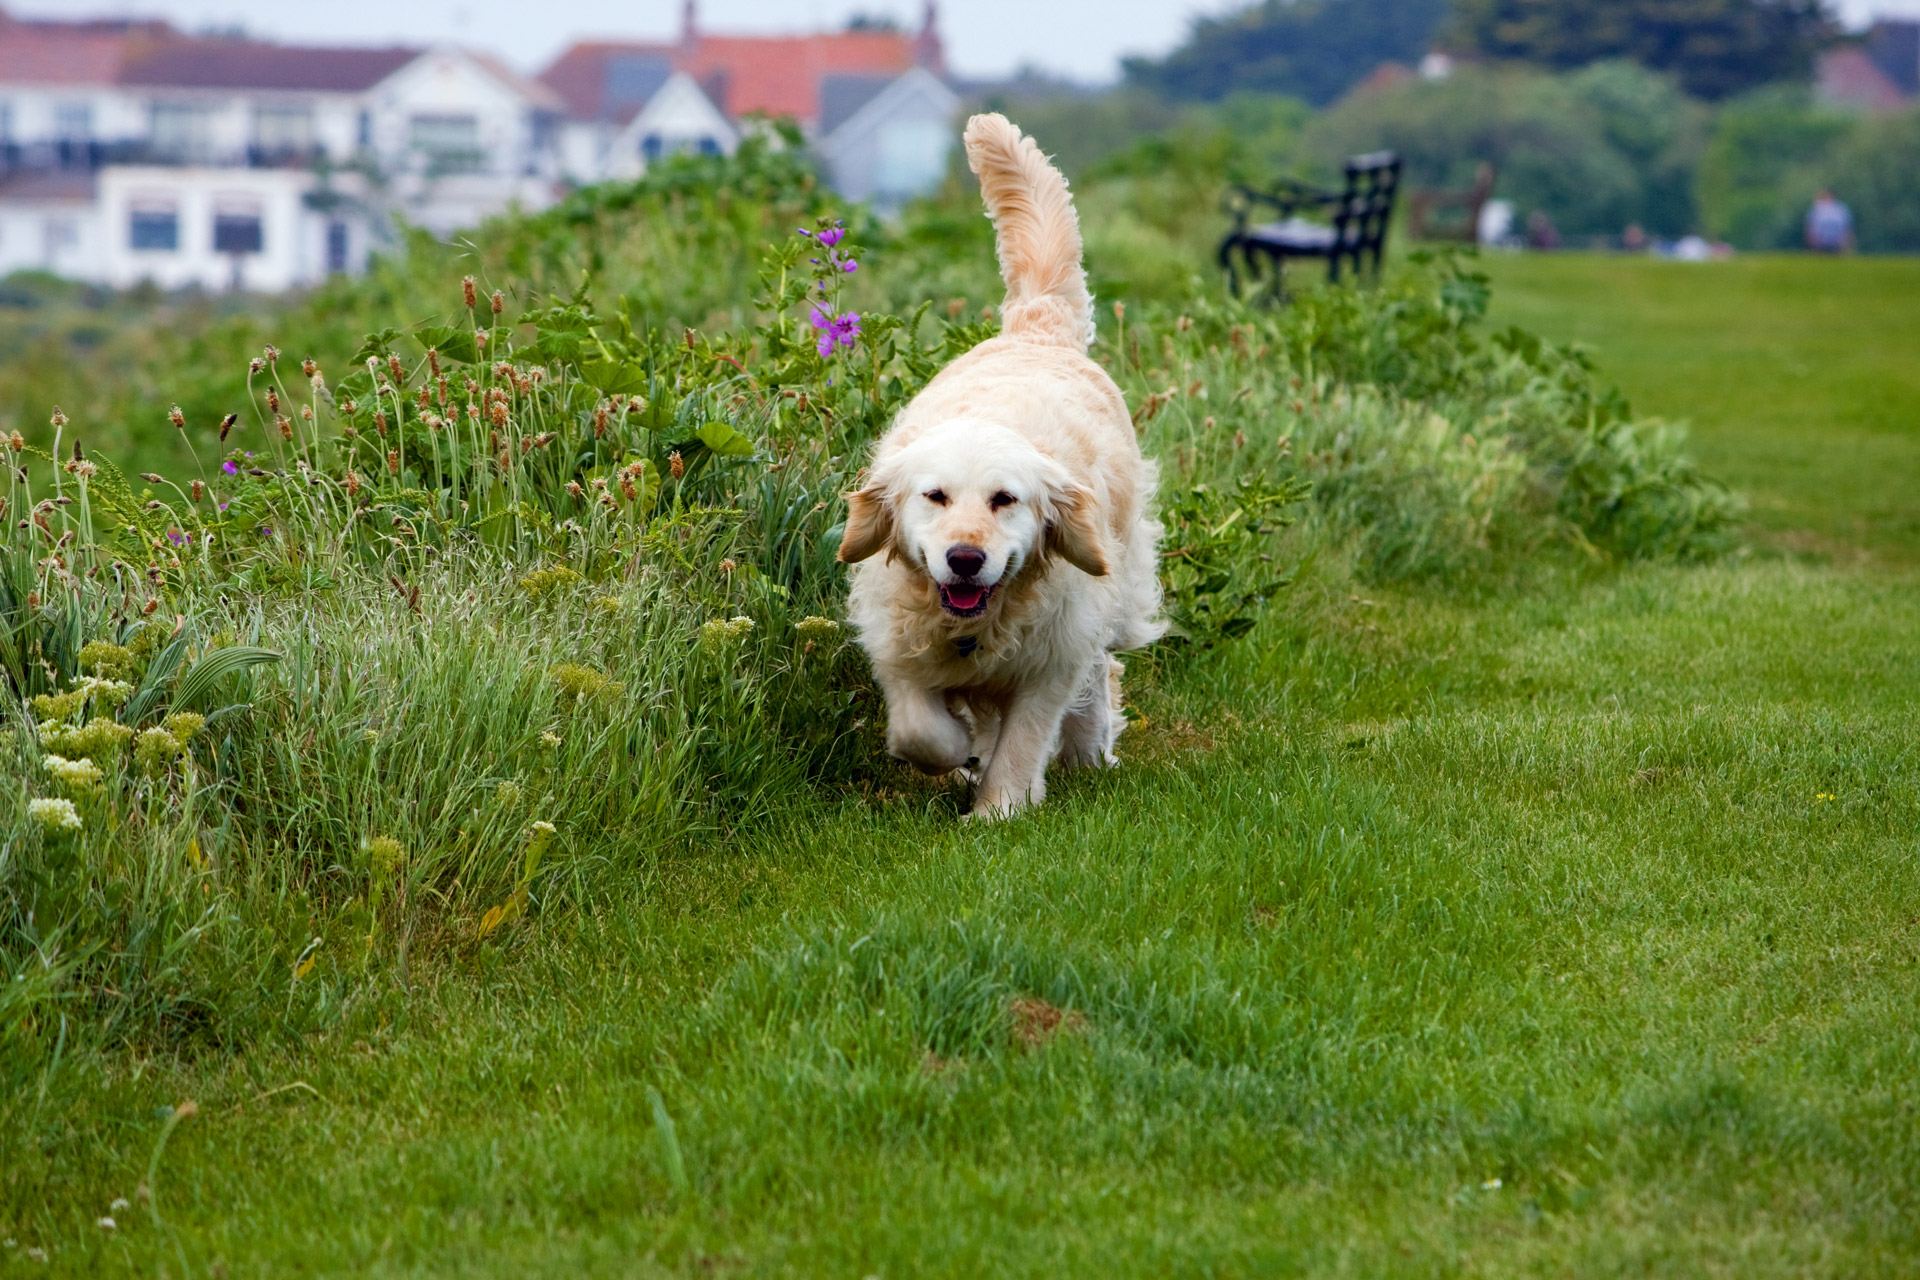

In [4]:
from PIL import Image
img = Image.open("./DLPT/data/golden-retriever-dog.jpg") # Very cute!
img # img.show() outside of notebooks

* The image is then preprocessed, and a batch dimension is added via `unsqueeze`, so we can feed it through `resnet`

In [5]:
img_t = preprocess(img)

In [6]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

### Run!

* In PyTorch, we have to put our network into `eval` mode before testing it
* This is important for layers like batch normalizatin and dropout, which function diffferently during inference than during training
* Then, we can process our image "batch," containing the photo of the Golden Retriever

In [7]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
%timeit resnet(batch_t)
out = resnet(batch_t) # %timeit doesn't allow us to capture the output
print(out)

31.6 ms ± 903 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
tensor([[-2.5182e-02, -1.3094e-01, -8.9442e-02,  2.9558e-01, -2.9001e-02,
          2.8331e-02, -2.2046e-01,  1.9352e-01,  7.8330e-01, -9.8266e-02,
          2.6589e-01,  2.9990e-02, -2.3217e-01,  9.2428e-02, -2.3082e-02,
          3.3213e-01, -1.5065e-02, -1.5951e-03,  6.9826e-01, -5.8723e-01,
          5.8382e-01,  4.7261e-01, -8.7813e-01,  1.6593e-01,  2.9518e-02,
          2.6671e-01,  8.4016e-02,  2.6811e-01,  1.9270e-01, -1.9936e-01,
          1.5071e-01, -9.2714e-03,  5.0971e-01,  2.9570e-02,  9.6438e-02,
         -3.1967e-02, -4.8377e-01, -2.4779e-01,  1.4755e-01, -1.7639e-01,
         -2.5736e-01, -1.0889e-01, -1.2012e-01,  7.9517e-02,  2.3960e-01,
          1.8717e-01, -2.2955e-01,  5.4949e-02,  2.4203e-02,  8.4383e-02,
         -6.0504e-01,  1.3286e-01, -5.0211e-02,  3.4421e-01, -2.1588e-01,
         -2.8012e-01,  4.1649e-02,  1.8533e-01, -1.8770e-01, -6.3480e-02,
         -2.1414e-01, -7.5352e-02, -3.4657

* To interpret our output, we load the `imagenet_classes.txt` file, containing the labels
* We then check the label corresponding to the index with the highest score that our `resnet` produced

In [9]:
with open("./DLPT/data/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [10]:
# Returns a namedtuple `(values, indices)`, where `values` are the `max`es, and `indices`
# the corresponding `argmax`es
_, index = torch.max(out, 1)

In [11]:
index.shape

torch.Size([1])

In [12]:
type(index.item())

int

* Using this, we can now retreive the corresponding label
* In addition to that, we use `torch.nn.functional.softmax` to compute the probability from the logits

In [13]:
import torch.nn.functional as F
# Remember, axis 0 is still the batch dimension,
# from which we retrieve (goldenly), the first image
percentage = F.softmax(out, dim=1)[0] * 100
labels[index.item()], percentage[index.item()].item()

('golden retriever', 75.28535461425781)

* We can also sort the scores, and see which other categories the model had the most confidence in

In [14]:
# Once again a namedtuple `(values, indices)`
_, indices = torch.sort(out, descending=True)
for spot, i in enumerate(indices[0][:10]):
    print(f"{spot+1:2}.  ({percentage[i].item():5.2f}%):\t{labels[i]}")

 1.  (75.29%):	golden retriever
 2.  ( 7.42%):	Labrador retriever
 3.  ( 0.57%):	Dandie Dinmont, Dandie Dinmont terrier
 4.  ( 0.26%):	cocker spaniel, English cocker spaniel, cocker
 5.  ( 0.21%):	Sussex spaniel
 6.  ( 0.21%):	clumber, clumber spaniel
 7.  ( 0.18%):	Irish terrier
 8.  ( 0.16%):	otterhound, otter hound
 9.  ( 0.14%):	cairn, cairn terrier
10.  ( 0.12%):	kuvasz
